R-squared: 0.22
Regresssion coeff: [-1.97978337  1.44313328  0.94441744  0.36773217]


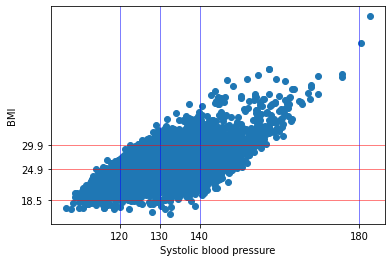

In [12]:
# Multiple Linear Regression
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
# Importing the dataset
dataset = pd.read_csv('framingham.csv')
#dataset = dataset[~dataset['BMI'].isnull()] #ignoring a few null values from the dataset.

imputer = SimpleImputer(strategy='most_frequent')
dataset = pd.DataFrame(imputer.fit_transform(dataset))
dataset.columns = dataset.columns
dataset.index = dataset.index
#data1.isnull().sum()

X = dataset.iloc[:, [0,12,1,3]].values #select SEX,BMI,AGE,CURSMOKE #,3,6
y = dataset.iloc[:, 10].values #select SYSBP

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X)

print ('R-squared: %.2f' % regressor.score(X_test, y_test))
print ('Regresssion coeff:',regressor.coef_)


fig, ax = plt.subplots()
ax.set_yticks([18.5, 24.9, 29.9], minor=False) #important values of BMI
ax.set_xticks([120, 130, 140, 180], minor=False) #important values of SysBP
ax.yaxis.grid(True, which='major',linewidth='0.5', color='red')
ax.xaxis.grid(True, which='major',linewidth='0.5', color='blue')

plt.scatter(y_pred, X[:,1], marker='o')
plt.xlabel("Systolic blood pressure")
plt.ylabel("BMI")

plt.show()